## Extramarital Affairs Dataset
The dataset is affairs dataset and comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

## Description of Variables
The dataset contains 6366 observations of 9 variables:

+ rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
+ age: woman's age
+ yrs_married: number of years married
+ children: number of children
+ religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
+ educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
+ occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
+ occupation_husb: husband's occupation (same coding as above)
+ affairs: time spent in extra-marital affairs

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

### Loading dataset

In [2]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
df.shape

(6366, 9)

In [4]:
# adding "affair" column: 1 represents having affairs, 0 represents not
df['affair'] = (df.affairs > 0).astype(int)
df = df.rename(columns={"rate_marriage": "rateMarriage", "yrs_married": "yearsMarried","occupation_husb":"husbandOccupation"})

### Data Analysis

In [5]:
df.groupby('affair').mean()

,rateMarriage,age,yearsMarried,children,religious,educ,occupation,husbandOccupation,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


The women have affair when rating in marriage is low.

In [6]:
df.groupby('rateMarriage').mean()

,age,yearsMarried,children,religious,educ,occupation,husbandOccupation,affairs,affair
rateMarriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


As increasing in age, yearsMarried & children , decrease in marriage rating

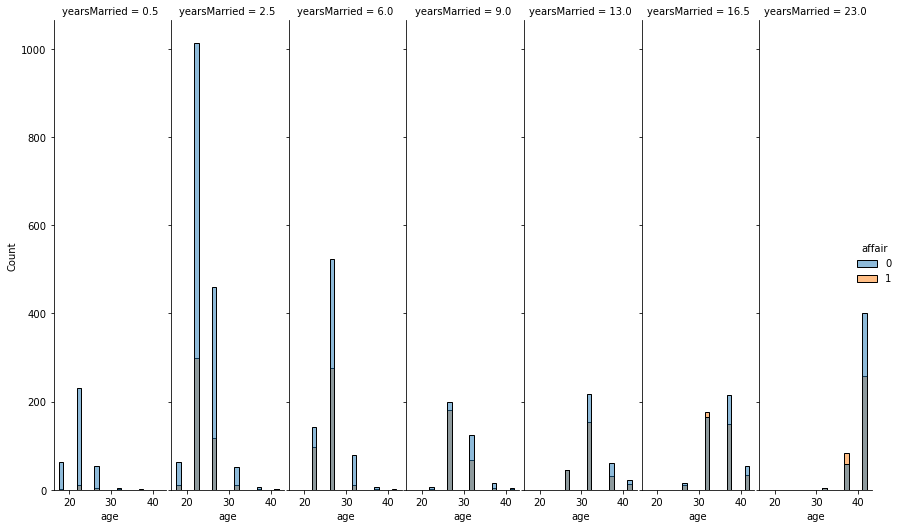

In [7]:
size=sns.displot(data=df, x='age', hue='affair', col='yearsMarried')
size.fig.set_figwidth(12)
size.fig.set_figheight(8)


D:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


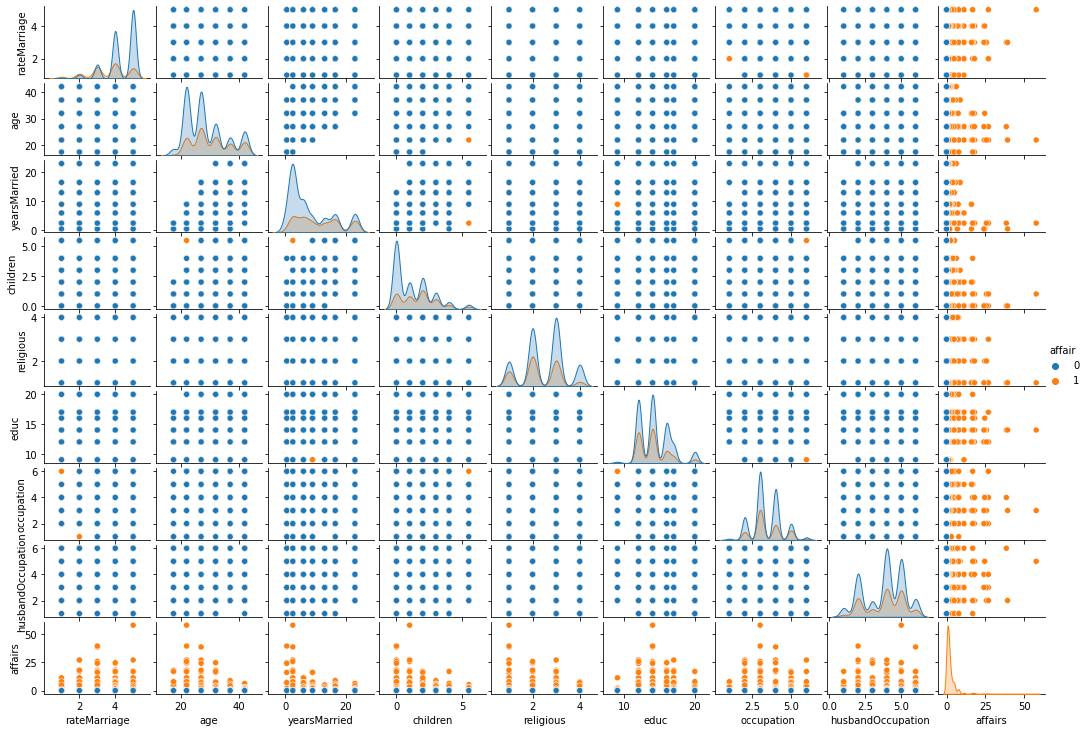

In [8]:
size=sns.pairplot(data=df, hue="affair")
size.fig.set_figwidth(15)
size.fig.set_figheight(10)

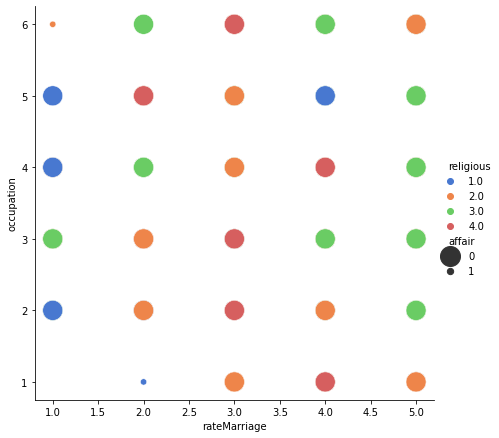

In [9]:
sns.relplot(x="rateMarriage", y="occupation", hue="religious", size="affair",
            sizes=(40, 400), alpha=1.0, palette="muted",
            height=6, data=df)

([<matplotlib.patches.Wedge at 0x1a1b7069430>,
 [Text(-0.5821130082647358, 0.9333511909292127, 'NO'),
  Text(0.5821130082647361, -0.9333511909292126, 'YES')],
 [Text(-0.3175161863262195, 0.5091006495977524, '67.75%'),
  Text(0.3175161863262197, -0.5091006495977523, '32.25%')])

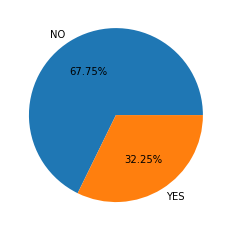

In [10]:
plt.pie(df.groupby('affair')['affairs'].count(), autopct='%1.2f%%', labels=['NO','YES'])

In [11]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('affair ~ rateMarriage + age + yearsMarried + children + \
                  religious + educ + C(occupation) + C(husbandOccupation)',
                  df, return_type="dataframe")
X.columns
X.head(5)

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(husbandOccupation)[T.2.0],C(husbandOccupation)[T.3.0],C(husbandOccupation)[T.4.0],C(husbandOccupation)[T.5.0],C(husbandOccupation)[T.6.0],rateMarriage,age,yearsMarried,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [12]:
# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(husbandOccupation)[T.2.0]':'occ_husb_2',
                        'C(husbandOccupation)[T.3.0]':'occ_husb_3',
                        'C(husbandOccupation)[T.4.0]':'occ_husb_4',
                        'C(husbandOccupation)[T.5.0]':'occ_husb_5',
                        'C(husbandOccupation)[T.6.0]':'occ_husb_6'})



X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rateMarriage,age,yearsMarried,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [13]:
y = np.ravel(y)

In [14]:
print(X.shape)
print(y.shape)

(6366, 17)
(6366,)


In [15]:
def show_Box_Plot(df):
    fig, ax = plt.subplots(figsize=(20,15))
    sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3)

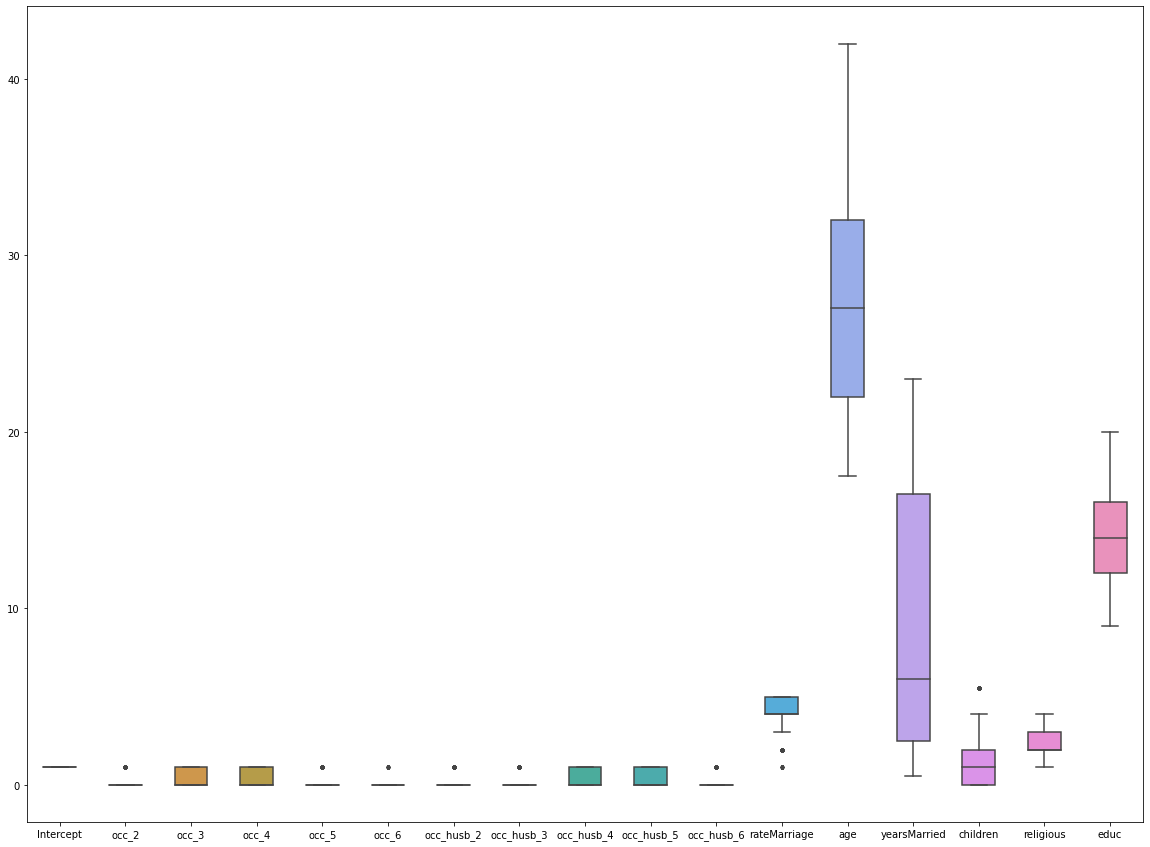

In [16]:
show_Box_Plot(X)

In [17]:
X.drop(['Intercept'], axis=1, inplace=True)

### Scaling

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data to training & testing

In [19]:
x_train,x_test,y_train,y_test= train_test_split(X_scaled, y,test_size=0.3,random_state=42)

In [20]:
model = LogisticRegression(max_iter=700)
model.fit(x_train, y_train)

LogisticRegression(max_iter=700)

In [21]:
pred= model.predict(x_test)

### Model Evaluation

In [22]:
print("MEAN_SQUARED_ERROR",metrics.mean_squared_error(y_test, pred))
print("MEAN_ABSOLUTE_ERROR",metrics.mean_absolute_error(y_test,pred))

MEAN_SQUARED_ERROR 0.2753926701570681
MEAN_ABSOLUTE_ERROR 0.2753926701570681


In [23]:
print("ACCURACY", metrics.accuracy_score(y_test, pred)*100)

ACCURACY 72.4607329842932


In [24]:
metrics.confusion_matrix(y_test, pred)

array([[1140,  135],
       [ 391,  244]], dtype=int64)

In [25]:
auc = metrics.roc_auc_score(y_test, pred)
auc

0.6391848077813803

In [26]:
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)

In [27]:
threshold

array([2., 1., 0.])

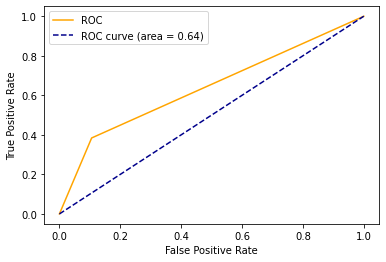

In [28]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [29]:
scores = cross_val_score(model,X_scaled,y,cv=10,scoring='accuracy')
print(scores)
print(scores.mean())

[0.71899529 0.70172684 0.73783359 0.70643642 0.70486656 0.7299843
 0.72955975 0.70597484 0.75471698 0.74685535]
0.7236949932367722


From the model accuracy said as 72%. Also, applied the cross_val_score to make sure the accuracy still in the same range.
Looks good! Still performing 72%.